In [3]:
import networkx as nx
import urllib
import matplotlib.pyplot as plt

%matplotlib inline

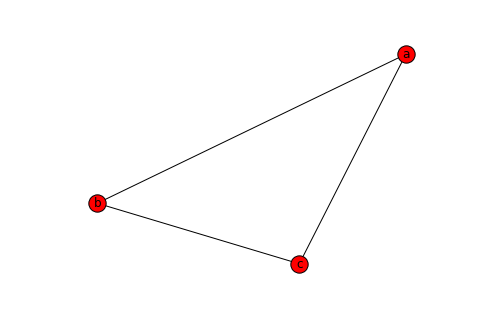

In [4]:
g = nx.Graph() # creat a blank graph
g.add_edge('a', 'b') # insert and edge into the graph, nodes will create automatically
g.add_edge('b', 'c')
g.add_edge('c', 'a')

nx.draw(g, with_labels=True)

In [5]:
g.nodes()

['c', 'a', 'b']

In [6]:
g.edges()

[('c', 'a'), ('c', 'b'), ('a', 'b')]

In [7]:
def read_lj_friends(g, name):
    """Fetch a list of friends from the API, walk through the lines
    in the response and create edges in graph g"""
    
    # fetch the friend-list from LiveJournal
    response = urllib.request.urlopen(
        r'https://www.livejournal.com/misc/fdata.bml?user=' + name)
    
    # walk trough the lines in the response and add each one as an edge
    # in a network for line in response.readlines()
    for line in response.readlines():
        # comments in the response start with a '#'
        if line.startswith(b'#'):
            continue
        
        # make sure we don't have an empty line
        parts = line.split()
        if len(parts) == 0:
            continue
            
        # the format s "< name" (incoming) or "> name" (outgoing)
        # add the edge to the network
        if parts[0] == '<':
            g.add_edge(parts[1], name)
        else:
            g.add_edge(name, parts[1])
            
    return g

In [8]:
g = read_lj_friends(nx.Graph(), "valerois")

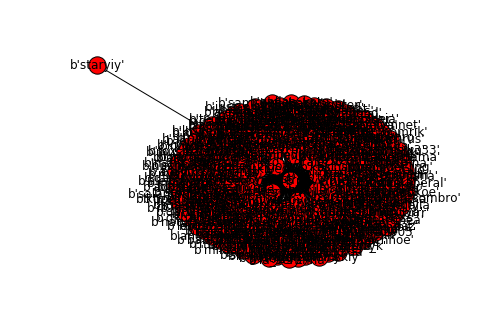

In [9]:
nx.draw(g, with_labels=True)

In [10]:
len(g)

302

In [11]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    """Creates an ego graph starting from a center node and searches for 
    friends in max_depth layers of friends deep"""
    
    print(center, current_depth, max_depth, taboo_list)
    if current_depth == max_depth:
        # if we have reached the depth limit of the search, return
        print('Out of depth')
        return taboo_list
    if center in taboo_list:
        # we've been here before -- return right away
        return taboo_list
    else:
        taboo_list.append(center) # we shall never return to the same node
        
    read_lj_friends(g, center) # call LiveJournal API and get data for a node
    
    for node in g.neighbors(center):
        # iterate through all friends of the central node, call snowball sampling
        # recursively
        taboo_list = snowball_sampling(g, node, current_depth=current_depth+1,
                                       max_depth=max_depth,
                                       taboo_list=taboo_list)
        return taboo_list

In [12]:
g = nx.Graph()
snowball_sampling(g, 'valerois', max_depth=2)
print(len(g))


valerois 0 2 []
b'lian_lj' 1 2 ['valerois']


TypeError: Can't convert 'bytes' object to str implicitly